PANDAS TUTORIAL part 1

2018-12-06 12:13:00 WIB

This tutorial is about how to create dataset
Create Data

We begin by creating our own data set for analysis. This prevents the end user reading this tutorial from having to download any files to replicate the results below. We will export this data set to a text file so that you can get some experience pulling data from a text file.
Get Data

We will learn how to read in the text file. The data consist of baby names and the number of baby names born in the year 1880.
Prepare Data

Here we will simply take a look at the data and make sure it is clean. By clean I mean we will take a look inside the contents of the text file and look for any anomalities. These can include missing data, inconsistencies in the data, or any other data that seems out of place. If any are found we will then have to make decisions on what to do with these records.
Analyze Data

We will simply find the most popular name in a specific year.
Present Data

Through tabular data and a graph, clearly show the end user what is the most popular name in a specific year.

The Pandas library is used for all the data analysis excluding a small piece of the data presentation section. The Matplotlib library will only be needed for the data presentation section. Importing the libraries is the first step we will take in the lesson.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random

%matplotlib inline


## Create Data

In [2]:
names = ["John", "Paul", "Steve", "Glen", "Sid"]

In [9]:
random.seed(500)
Names = [names[random.randint(low = 0, high = len(names))] for i in range(1000)]
Names[:10]

['Steve',
 'Paul',
 'Paul',
 'John',
 'Paul',
 'Paul',
 'Paul',
 'Steve',
 'Steve',
 'Steve']

In [8]:
Age = [random.randint(low=17, high = 30) for i in range(1000)]
Age[:10]

[25, 28, 19, 29, 28, 20, 24, 18, 25, 28]

In [11]:
SexPistols_DS = list(zip(Names, Age))
SexPistols_DS[:10]

[('Steve', 25),
 ('Paul', 28),
 ('Paul', 19),
 ('John', 29),
 ('Paul', 28),
 ('Paul', 20),
 ('Paul', 24),
 ('Steve', 18),
 ('Steve', 25),
 ('Steve', 28)]

In [13]:
df = pd.DataFrame(data = SexPistols_DS, columns = ["Names","Age"])
df[:10]

,Names,Age
0,Steve,25
1,Paul,28
2,Paul,19
3,John,29
4,Paul,28
5,Paul,20
6,Paul,24
7,Steve,18
8,Steve,25
9,Steve,28


In [15]:
df.to_csv("/home/pranatha/git_workspace/Tutorials/DataScience/DataWrangling/Frameworks/Inputs/SPAges.txt", index = False, header = False)

## Get Data

In [19]:
Loc = r"/home/pranatha/git_workspace/Tutorials/DataScience/DataWrangling/Frameworks/Inputs/SPAges.txt"
df = pd.read_csv(Loc)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
Steve    999 non-null object
25       999 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [21]:
df = pd.read_csv(Loc, header = None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
0    1000 non-null object
1    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [23]:
df = pd.read_csv(Loc, names = ["Names", "Age"])
df.head(5)

,Names,Age
0,Steve,25
1,Paul,28
2,Paul,19
3,John,29
4,Paul,28


In [24]:
df["Names"].unique()

array(['Steve', 'Paul', 'John', 'Glen', 'Sid'], dtype=object)

In [27]:
for i in df["Names"].unique():
    print(i)

Steve
Paul
John
Glen
Sid


In [29]:
print(df["Names"].describe())

count     1000
unique       5
top       John
freq       206
Name: Names, dtype: object


In [30]:
name =df.groupby("Names")
df = name.sum()
df

,Age
Names,
Glen,4345
John,4794
Paul,4585
Sid,4658
Steve,4617


## Analyze Data

In [31]:
Sorted = df.sort_values("Age", ascending = False)
Sorted.head()

,Age
Names,
John,4794
Sid,4658
Steve,4617
Paul,4585
Glen,4345


In [33]:
df["Age"].min()

4345

In [34]:
df["Age"].max()

4794

## Present Data

Most ages


,Age
Names,
John,4794
Sid,4658
Steve,4617
Paul,4585
Glen,4345


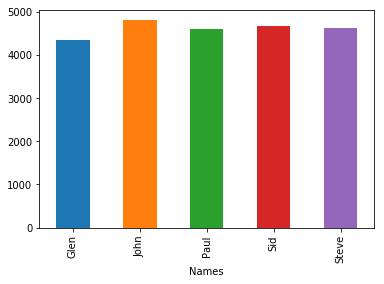

In [35]:
df["Age"].plot.bar()
print("Most ages")
df.sort_values(by="Age", ascending = False)